## second derivative

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def central_diff_second_derivative(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def forward_diff_second_derivative(f, x, h):
    return (f(x + 2 * h) - 2 * f(x + h) + f(x)) / h**2

def backward_diff_second_derivative(f, x, h):
    return (f(x) - 2 * f(x - h) + f(x - 2 * h)) / h**2

numerical_derivative_func = [central_diff_second_derivative, forward_diff_second_derivative, backward_diff_second_derivative]

def f(x):
  return np.sin(x)

h = np.array([0.1, 0.05, 0.001, 0.0005, 0.0001])
x0 = np.pi/4

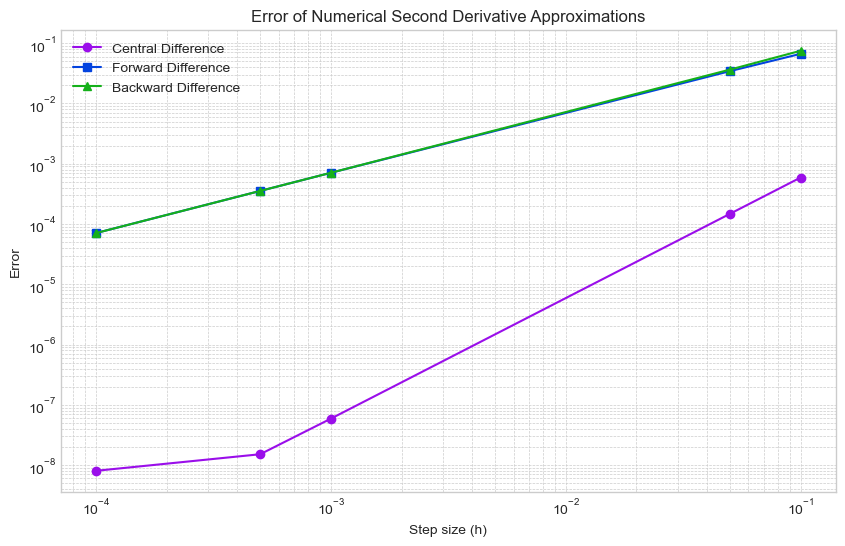

In [3]:
exact_second_derivative = -np.sin(x0)

numerical_derivatives = [numerical_derivative_func[i](f, x0, h) for i in range(3)]

errors = [np.abs(num_der - exact_second_derivative) for num_der in numerical_derivatives]

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(h, errors[0], color='xkcd:violet', marker='o', label="Central Difference")
ax.plot(h, errors[1], color='xkcd:blue', marker='s', label="Forward Difference")
ax.plot(h, errors[2], color='xkcd:green', marker='^', label="Backward Difference")
ax.set_xlabel("Step size (h)")
ax.set_ylabel("Error")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Error of Numerical Second Derivative Approximations")
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## pulsar timing

In [4]:
data = np.array([[0.0, 0.5, 1.0, 1.5, 2.0],
                 [200.0, 205.2, 210.8, 216.9, 223.5]]) # speed
h = 0.5

In [5]:
# acceleration at t=0 using forward difference
acc_forward = (data[1, 1] - data[1, 0]) / h

# at t=2 using backward difference
acc_backward = (data[1, 4] - data[1, 3]) / h

# at t=1 using central difference
acc_central = (data[1, 3] - data[1, 1]) / (2 * h)

print(f"t=0 (forward): {acc_forward:.2f}")
print(f"t=2 (backward): {acc_backward:.2f}")
print(f"t=1 (central): {acc_central:.2f}")

t=0 (forward): 10.40
t=2 (backward): 13.20
t=1 (central): 11.70


## stellar structure

In [6]:
data = np.array([[1.0, 1.1, 1.2, 1.3, 1.4], # radius *e10
                 [10.0, 9.15, 8.20, 7.12, 5.90]]) #pressure

h = 0.1 # *e10

In [7]:
# gradient at r=1.4 with three point second order backward difference
grad = (3*data[1, 4] - 4*data[1, 3] + data[1, 2]) / (2 * h)

print(f"Gradient at r=1.4: {grad:.2f}")

Gradient at r=1.4: -12.90


## galactic dynamics

In [8]:
data = np.array([[10, 12, 14, 16, 18],
                [0.0020, 0.0035, 0.0055, 0.0080, 0.0110]])
h = 2.0

# centered difference derivative at D=14
derivative_central = (data[1, 3] - data[1, 1]) / h**2

# second derivative at D=14 using central difference
second_derivative_central = (data[1, 3] - 2 * data[1, 2] + data[1, 1]) / h**2

print(f"First derivative at D=14 (central): {derivative_central:.8f}")
print(f"Second derivative at D=14 (central): {second_derivative_central:.8f}")

First derivative at D=14 (central): 0.00112500
Second derivative at D=14 (central): 0.00012500
